### From the end of 2023 to the beginning of 2024, I came across plenty of news article saying that the U.S. crime rate actually dropped in 2023, contrary to popular belief. I want to explore and verify if this is indeed the case.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from prettytable import PrettyTable

import glob
import re

sns.set(style='darkgrid', palette = 'pastel')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

### Load arrest data

#### national

In [2]:
df_arrest_national = pd.read_csv('arrest_national.csv')
df_arrest_national.head()

,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,Embezzlement,Forgery and Counterfeiting,Fraud,Gambling - Total,Human Trafficking - Commercial Sex Acts,Human Trafficking - Involuntary Servitude,Larceny - Theft,Liquor Laws,Manslaughter by Negligence,Motor Vehicle Theft,Murder and Nonnegligent Manslaughter,Offenses Against the Family and Children,Prostitution and Commercialized Vice,Rape,Robbery,"Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)",Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.",data_year
0,64358,543446,0,146907,0,478166,193498,0,1504453,0,27712,42980,127760,0,0,243489,109567,2463,67911,5925,52974,30377,8584,37517,53630,155845,12068,137572,156565,0,39229,1960
1,64692,572276,0,158914,0,467505,204846,0,1504507,0,29583,46893,113215,0,0,264910,121945,2446,68968,5862,53971,27504,9130,37284,52888,163668,13085,136134,158042,0,40227,1961
2,63358,545111,0,150051,0,472786,196634,0,1432564,0,26567,44320,106355,0,0,260796,110438,2251,71953,5649,48288,26771,9030,38230,49233,160035,12805,114361,139738,0,40323,1962
3,72015,662318,0,176933,0,544918,221875,0,1576507,0,30807,55071,108654,0,0,326086,131698,2763,89296,6531,60608,28651,9885,42002,62043,198410,15524,92678,151553,0,46830,1963
4,84426,527835,5595,194736,68886,536870,237587,34670,1569845,8648,31220,49632,115914,0,0,385757,157206,2783,105331,7013,61588,36484,10704,45703,62843,207813,19137,94812,134438,82435,51647,1964


In [3]:
df_arrest_national.shape

(63, 32)

### Load census data

In [84]:
df_census = pd.read_csv('census_60_23.csv', index_col=0)

In [85]:
df_census_us

,year,U.S.
0,1960,179975000
1,1961,182973000
2,1962,185738000
3,1963,188438000
4,1964,191085000
...,...,...
59,2019,328239523
60,2020,331526933
61,2021,332048977
62,2022,333271411


In [9]:
df_census_us = df_census.iloc[:,:2]

In [10]:
#merge df_census_us with df_arrest_national
df_national = df_arrest_national.merge(df_census_us, left_on='data_year', right_on='year')

In [78]:
df_national

,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,Embezzlement,Forgery and Counterfeiting,Fraud,Gambling - Total,Human Trafficking - Commercial Sex Acts,Human Trafficking - Involuntary Servitude,Larceny - Theft,Liquor Laws,Manslaughter by Negligence,Motor Vehicle Theft,Murder and Nonnegligent Manslaughter,Offenses Against the Family and Children,Prostitution and Commercialized Vice,Rape,Robbery,"Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)",...,Driving Under the Influence_rate_per100k,Drug Abuse Violations - Grand Total_rate_per100k,Drunkenness_rate_per100k,Embezzlement_rate_per100k,Forgery and Counterfeiting_rate_per100k,Fraud_rate_per100k,Gambling - Total_rate_per100k,Human Trafficking - Commercial Sex Acts_rate_per100k,Human Trafficking - Involuntary Servitude_rate_per100k,Larceny - Theft_rate_per100k,Liquor Laws_rate_per100k,Manslaughter by Negligence_rate_per100k,Motor Vehicle Theft_rate_per100k,Murder and Nonnegligent Manslaughter_rate_per100k,Offenses Against the Family and Children_rate_per100k,Prostitution and Commercialized Vice_rate_per100k,Rape_rate_per100k,Robbery_rate_per100k,"Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)_rate_per100k",Simple Assault_rate_per100k,"Stolen Property: Buying, Receiving, Possessing_rate_per100k",Suspicion_rate_per100k,Vagrancy_rate_per100k,Vandalism_rate_per100k,"Weapons: Carrying, Possessing, Etc._rate_per100k"
0,64358,543446,0,146907,0,478166,193498,0,1504453,0,27712,42980,127760,0,0,243489,109567,2463,67911,5925,52974,30377,8584,37517,53630,...,107.51,0.00,835.92,0.00,15.40,23.88,70.99,0.00,0.00,135.29,60.88,1.37,37.73,3.29,29.43,16.88,4.77,20.85,29.80,86.59,6.71,76.44,86.99,0.00,21.80
1,64692,572276,0,158914,0,467505,204846,0,1504507,0,29583,46893,113215,0,0,264910,121945,2446,68968,5862,53971,27504,9130,37284,52888,...,111.95,0.00,822.26,0.00,16.17,25.63,61.88,0.00,0.00,144.78,66.65,1.34,37.69,3.20,29.50,15.03,4.99,20.38,28.90,89.45,7.15,74.40,86.37,0.00,21.99
2,63358,545111,0,150051,0,472786,196634,0,1432564,0,26567,44320,106355,0,0,260796,110438,2251,71953,5649,48288,26771,9030,38230,49233,...,105.87,0.00,771.28,0.00,14.30,23.86,57.26,0.00,0.00,140.41,59.46,1.21,38.74,3.04,26.00,14.41,4.86,20.58,26.51,86.16,6.89,61.57,75.23,0.00,21.71
3,72015,662318,0,176933,0,544918,221875,0,1576507,0,30807,55071,108654,0,0,326086,131698,2763,89296,6531,60608,28651,9885,42002,62043,...,117.74,0.00,836.62,0.00,16.35,29.22,57.66,0.00,0.00,173.05,69.89,1.47,47.39,3.47,32.16,15.20,5.25,22.29,32.92,105.29,8.24,49.18,80.43,0.00,24.85
4,84426,527835,5595,194736,68886,536870,237587,34670,1569845,8648,31220,49632,115914,0,0,385757,157206,2783,105331,7013,61588,36484,10704,45703,62843,...,124.34,18.14,821.54,4.53,16.34,25.97,60.66,0.00,0.00,201.88,82.27,1.46,55.12,3.67,32.23,19.09,5.60,23.92,32.89,108.75,10.01,49.62,70.36,43.14,27.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,331292,2805416,7739,151993,17937,280106,817973,1367942,280305,12394,43133,103931,2811,540,89,763604,150025,1010,75929,10231,78607,25318,21145,73281,39143,...,250.38,418.73,85.80,3.79,13.20,31.81,0.86,0.17,0.03,233.74,45.92,0.31,23.24,3.13,24.06,7.75,6.47,22.43,11.98,274.54,24.79,0.19,5.87,46.56,42.94
59,347356,2942824,7686,153840,15768,262768,797848,1247060,259233,12338,41181,107077,2291,534,283,780036,146908,1169,75277,10129,69806,24333,22094,72377,38645,...,243.07,379.92,78.98,3.76,12.55,32.62,0.70,0.16,0.09,237.64,44.76,0.36,22.93,3.09,21.27,7.41,6.73,22.05,11.77,281.49,23.35,0.40,5.39,46.89,41.29
60,334452,2051465,8398,134800,10188,200961,646550,938869,159251,8249,27666,73462,1612,377,187,573950,95016,1332,74255,11695,51471,13744,19658,61915,29292,...,195.02,283.20,48

### nation wide arrest 1960-2022 (total number)

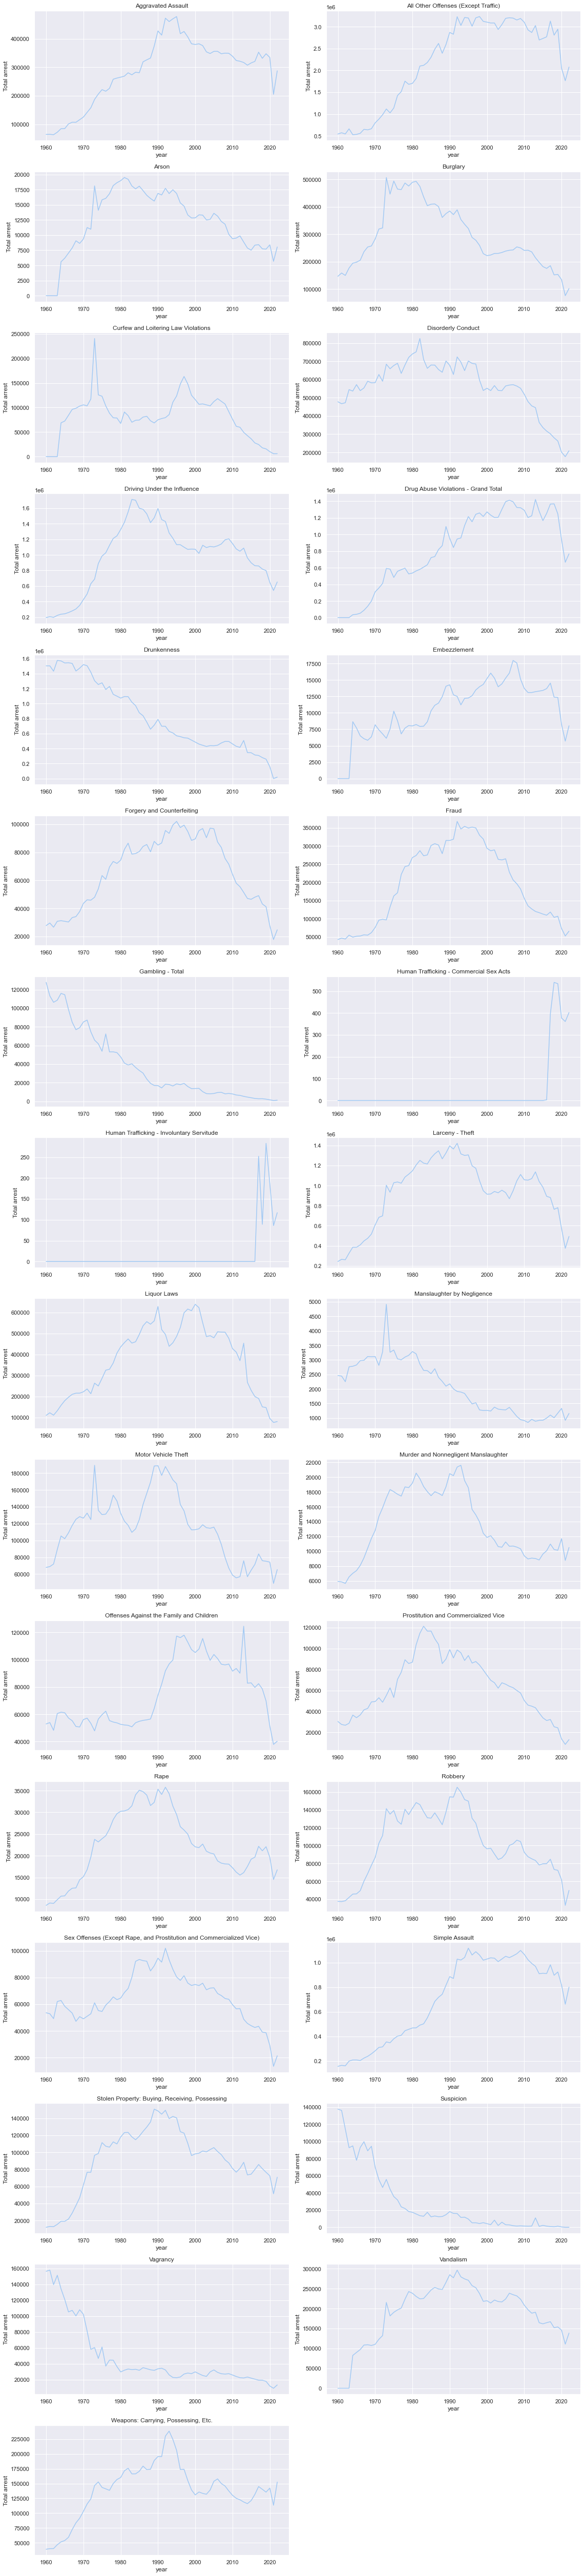

In [38]:
col_list = df_national.columns[:31]
plt.figure(figsize=(16,70))
for i, col in enumerate(col_list):
    plt.subplot(16,2,i+1)
    sns.lineplot(data =df_national, x='year', y= col).set(title=col)
    plt.ylabel('Total arrest')

plt.tight_layout()

####  In the FBI’s Uniform Crime Reporting (UCR) Program, violent crime is composed of four offenses: murder and nonnegligent manslaughter, rape, robbery, and aggravated assault. Violent crimes are defined in the UCR Program as those offenses that involve force or threat of force.

In [29]:
# add a new feature called Violent crime
df_national['Violent crime'] = df_national['Aggravated Assault'] + df_national['Rape'] + df_national['Robbery'] + df_national['Murder and Nonnegligent Manslaughter']

[Text(0.5, 1.0, 'Violent crime arrest')]

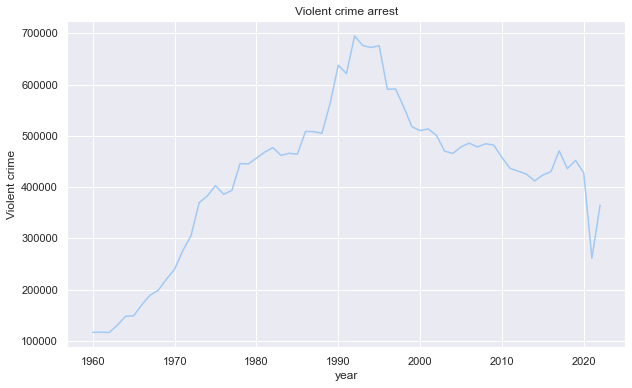

In [40]:
plt.figure(figsize=(10,6))
sns.lineplot(data =df_national, x='year', y= 'Violent crime').set(title='Violent crime arrest')

### National crime estimate

#### load 1979-2022 crime data

In [69]:
file_list = glob.glob(r'estimate_national\*.csv')

In [48]:
# extract file names
df_estimate = pd.DataFrame()
for file in file_list:
    crime = re.search('[\w-]+?(?=\.)', file).group()
    df =  pd.read_csv(file)
    df['crime'] = crime
    df_estimate = df.append(df_estimate, ignore_index=True)

There is no crime data available between 1960 and 1978, we can delete those columns

In [60]:
df_estimate = df_estimate.iloc[:,19:]

In [64]:
# row 2 and 4 are duplicates; delete row 2
df_estimate.drop(index=2, inplace=True)

In [68]:
#set crime column as index column and transpose the dataframe
df_estimate = df_estimate.set_index('crime').T

#### plot rate of crime by population 1979 - 2022

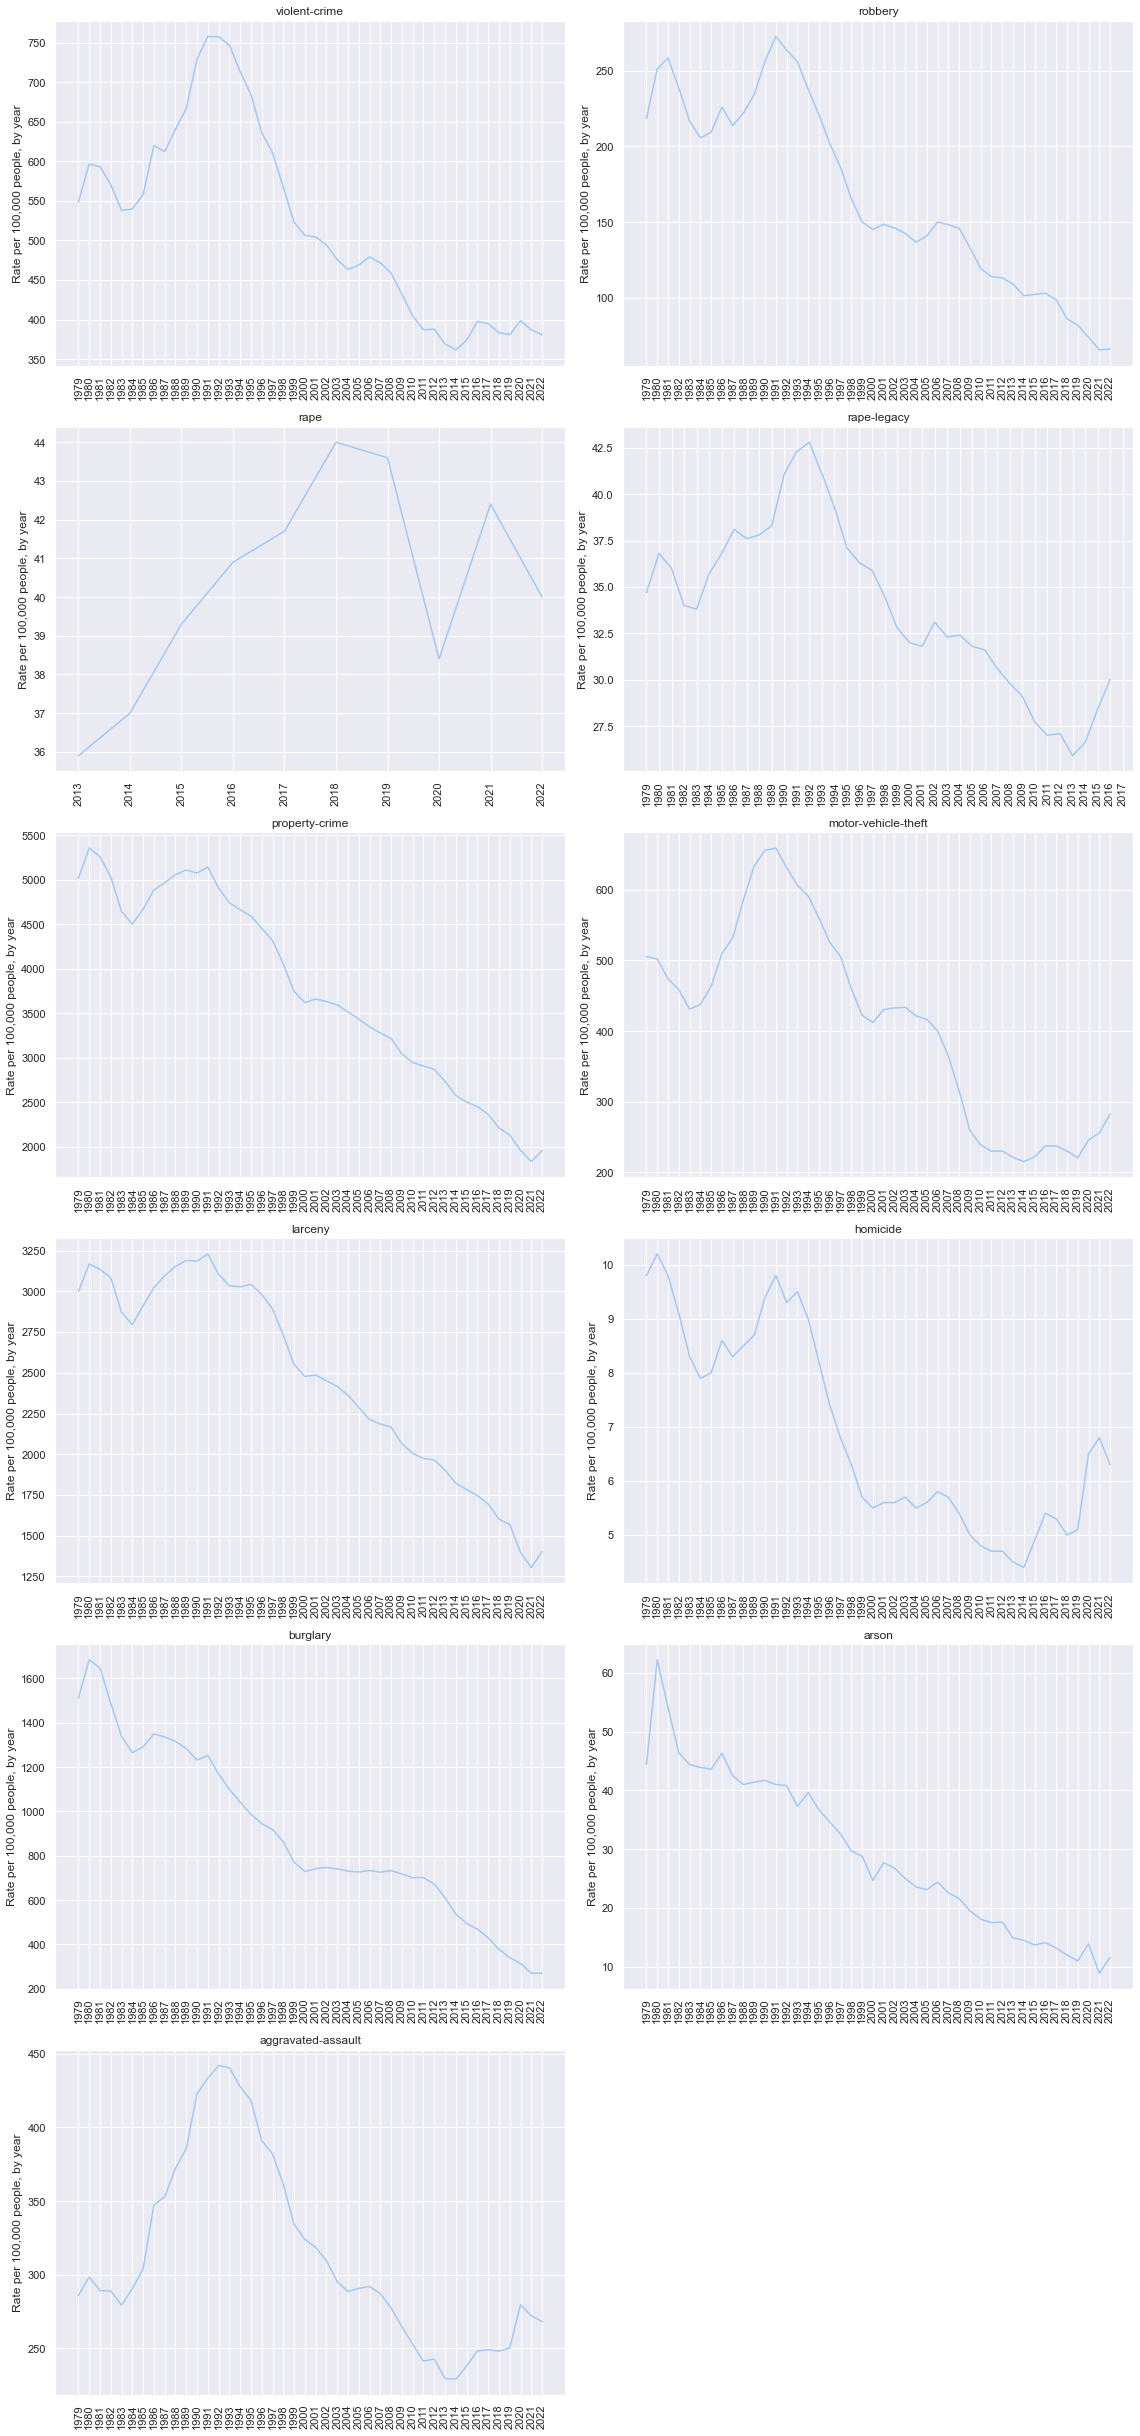

In [83]:
plt.figure(figsize=(16,34))
for i, col in enumerate(df_estimate.columns):
    plt.subplot(6,2,i+1)
    sns.lineplot(data=df_estimate, x=df_estimate.index, y= col).set(title=col)
    plt.ylabel('Rate per 100,000 people, by year')
    plt.xticks(rotation=90)

plt.tight_layout()

#### Load 2023 quarter 3 crime estimate

The FBI Quarterly Uniform Crime Report data release for Quarter 3, inclusive of January through September 2023, was made available on December 4, 2023. This report is based on data received from 14,005 of 19,018 law enforcement agencies in the country.  Data is compared to the same time frame from the previous year. Each quarterly report (released in March, June, September, and December) is cumulative and includes data from prior quarterly reports presented for the same year.

In [173]:
df_2023 = pd.read_excel('quarterly_ucr_2023/2023_Quarter_3_Quarterly Table 2.xlsx', header=4)

In [174]:
# get the percentage change in US
df_2023 = df_2023.iloc[0,:].reset_index()

In [175]:
# transpose dataframe
df_2023 = df_2023.set_index('index').T

In [176]:
df_2023

index,Region,Violent\ncrime,Murder,Rape,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson
0,Total,-8.20,-15.60,-14.80,-9.40,-6.80,-6.30,-11.70,-8.50,10.10,-11.80


fix column names to match df_estimate

In [177]:
df_2023.rename(columns={'Violent\ncrime': 'violent-crime',
                        'Murder': 'homicide',
                        'Rape': 'rape',
                        'Robbery': 'robbery',
                        'Aggravated\nassault': 'aggravated-assault',
                        'Property\ncrime': 'property-crime',
                        'Burglary': 'burglary',
                        'Larceny-\ntheft': 'larceny',
                        'Motor\nvehicle\ntheft': 'motor-vehicle-theft',
                        'Arson': 'arson'
                       }, inplace=True)

merge df_2023 and df_estimate

In [178]:
df_estimate_2023 = pd.concat([df_estimate, df_2023])

In [179]:
df_estimate_2023.reset_index(inplace=True)

In [180]:
# drop column region and rape-legacy
df_estimate_2023.drop(columns=['rape-legacy','Region'], inplace=True)
# fix column name
df_estimate_2023.rename(columns={'index':'year'}, inplace=True)
# fix value
df_estimate_2023.iloc[44,0]='2023'

add population to dataframe

In [181]:
df_estimate_2023['population'] = df_census_us[df_census_us.year >1978]['U.S.'].values

In [182]:
df_estimate_2023.tail(5)

,year,violent-crime,robbery,rape,property-crime,motor-vehicle-theft,larceny,homicide,burglary,arson,aggravated-assault,population
40,2019,380.80,81.80,43.60,2130.60,220.80,1569.20,5.10,340.50,11.00,250.40,328239523
41,2020,398.50,73.90,38.40,1958.20,246.00,1398.00,6.50,314.20,13.90,279.70,331526933
42,2021,387.00,65.50,42.40,1832.30,255.90,1305.50,6.80,270.90,8.90,272.20,332048977
43,2022,380.70,66.10,40.00,1954.40,282.70,1401.90,6.30,269.80,11.60,268.20,333271411
44,2023,-8.20,-9.40,-14.80,-6.30,10.10,-8.50,-15.60,-11.70,-11.80,-6.80,334914895


calculate the rate of crime by population in 2023 based on percentage change

In [183]:
col_list = df_estimate_2023.columns[1:-1].to_list()
for i, col in enumerate(col_list):
    rate_2023 = df_estimate_2023.iloc[43,i+1]*df_estimate_2023.iloc[43,-1]*(1+df_estimate_2023.iloc[44,i+1]/100)/df_estimate_2023.iloc[44,-1]
    df_estimate_2023.iloc[44,i+1] = np.round(rate_2023, 2)

In [184]:
df_estimate_2023.tail(5)

,year,violent-crime,robbery,rape,property-crime,motor-vehicle-theft,larceny,homicide,burglary,arson,aggravated-assault,population
40,2019,380.80,81.80,43.60,2130.60,220.80,1569.20,5.10,340.50,11.00,250.40,328239523
41,2020,398.50,73.90,38.40,1958.20,246.00,1398.00,6.50,314.20,13.90,279.70,331526933
42,2021,387.00,65.50,42.40,1832.30,255.90,1305.50,6.80,270.90,8.90,272.20,332048977
43,2022,380.70,66.10,40.00,1954.40,282.70,1401.90,6.30,269.80,11.60,268.20,333271411
44,2023,347.77,59.59,33.91,1822.29,309.73,1276.44,5.29,237.06,10.18,248.74,334914895


#### plot rate of crime by population 1979 - 2023

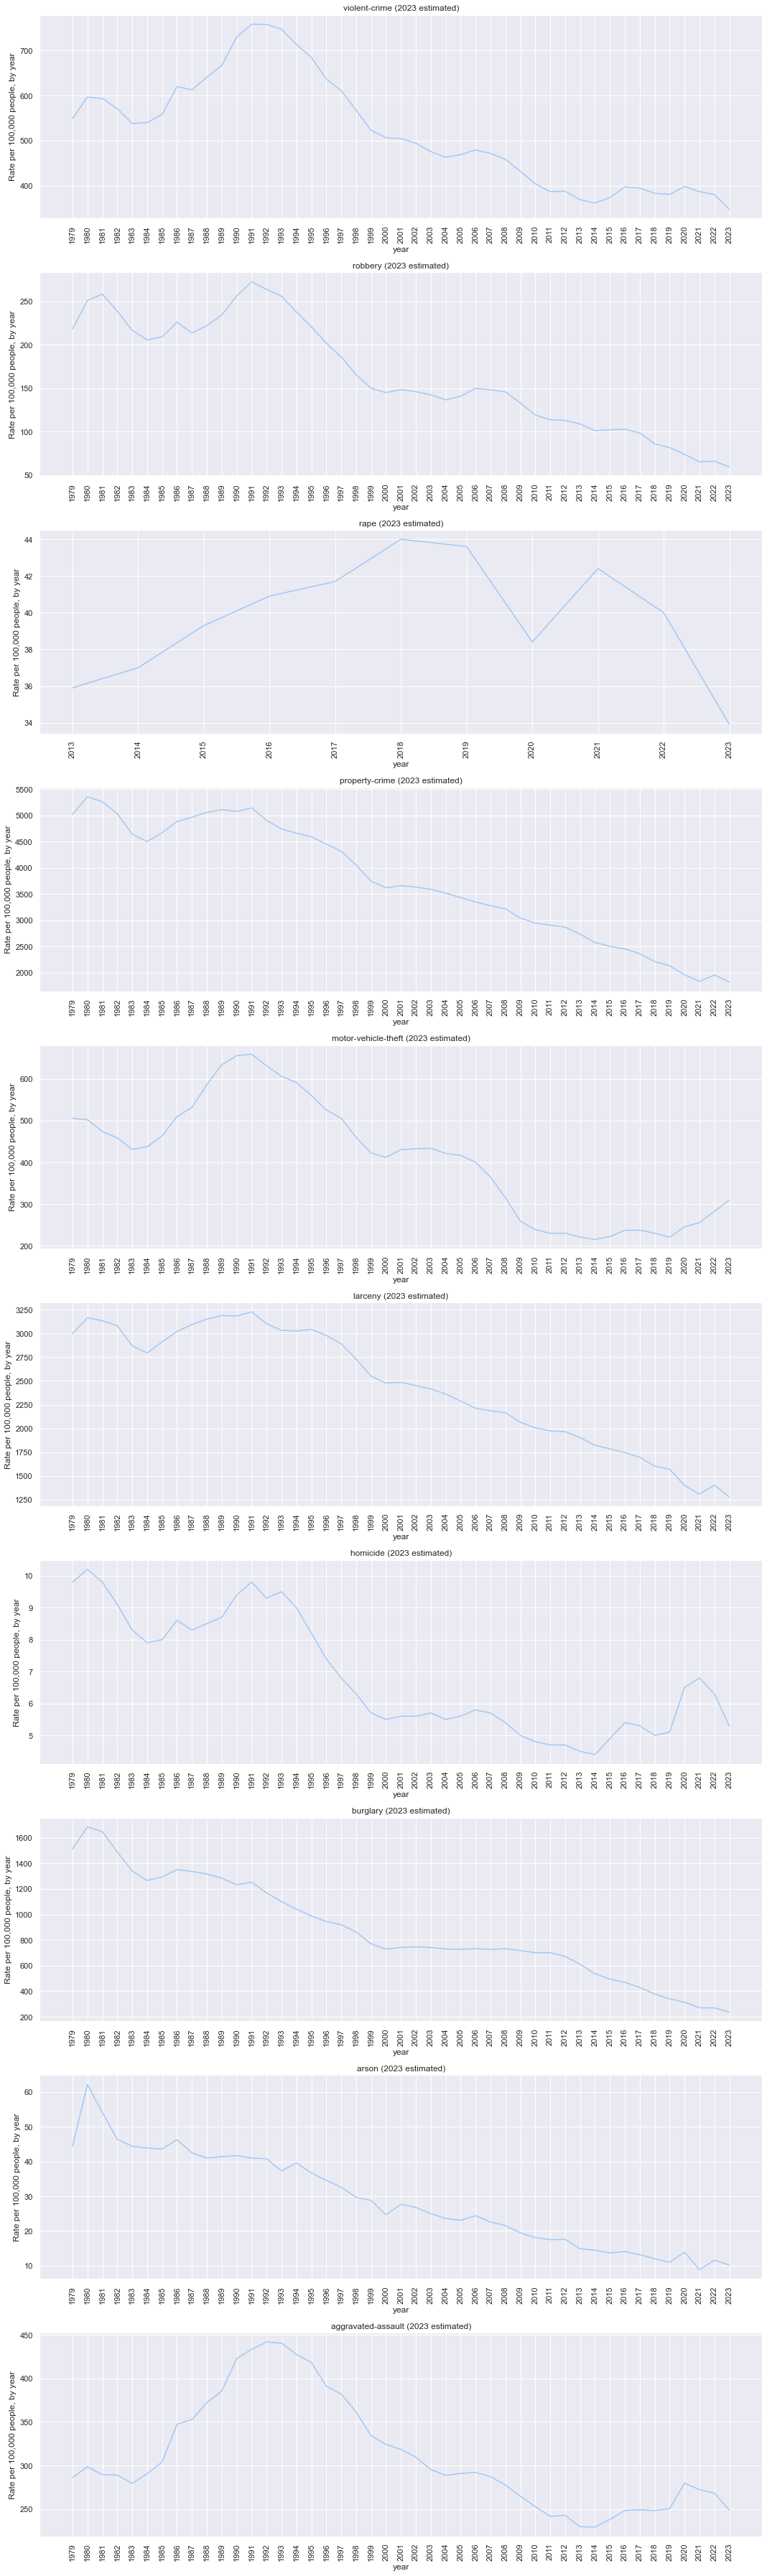

In [192]:
plt.figure(figsize=(15,50))
for i, col in enumerate(col_list):
    plt.subplot(10,1,i+1)
    sns.lineplot(data=df_estimate_2023, x='year', y= col).set(title=f'{col} (2023 estimated)')
    plt.ylabel('Rate per 100,000 people, by year')
    plt.xticks(rotation=90)

plt.tight_layout()


In [190]:
df_estimate_2023.columns

Index(['year', 'violent-crime', 'robbery', 'rape', 'property-crime',
       'motor-vehicle-theft', 'larceny', 'homicide', 'burglary', 'arson',
       'aggravated-assault', 'population'],
      dtype='object')

####  We can see that among all categories, only `motor-vehicle-theft` rate has increased (continuing a trend since 2019). `Homicide` and `aggravated-assault` continue to show trend of decreasing after an increase during COVID breakout.